In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
#import nltk.sentiment

# Challenge : Predict bitcoin closing price using a multivariate time-series training data and associated tweets data for those dates. Metric used for forecasting accuracy : Mean Absolute Percentage Error (MAPE)

# Read the timeseries data

In [3]:
btc_data = pd.read_csv('train_timeseries2.csv')

In [4]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 47 columns):
date                                          951 non-null object
close                                         951 non-null float64
avg_block_size                                951 non-null float64
blocks_size                                   951 non-null float64
cost_per_transaction_percent                  951 non-null float64
cost_per_transaction                          951 non-null float64
difficulty                                    951 non-null float64
est_transaction_volume_USD                    951 non-null float64
est_transaction_volume                        951 non-null float64
hash_rate                                     951 non-null float64
median_confirmation_time                      951 non-null float64
miners_revenue                                951 non-null float64
n_transactions_excl_chains_longer_than_100    951 non-null int64
n_transactions_excl_popular

In [5]:
btc_data.head()

,date,close,avg_block_size,blocks_size,cost_per_transaction_percent,cost_per_transaction,difficulty,est_transaction_volume_USD,est_transaction_volume,hash_rate,...,transactions_per_sec_min,transactions_per_sec_max,utxo_count_mean,utxo_count_stddev,utxo_count_min,utxo_count_max,news_stories_total,news_stories_positive,news_stories_negative,news_stories_neutral
0,2016-04-24,458.55,0.728040,66022.67805,1.385967,8.360698,1.786780e+11,110486293.2,240501.2912,1172443.384,...,0.766667,4.266667,36783070.63,27228.75866,36724621,36825214,6,2,0,4
1,2016-04-25,461.43,0.874485,66133.73765,0.888460,6.861613,1.786780e+11,168025613.1,362233.4608,1128032.650,...,0.700000,8.016667,36870963.17,17998.12914,36825828,36893715,25,7,8,10
2,2016-04-26,466.09,0.813180,66256.52779,1.129962,7.675906,1.786780e+11,170332016.5,363972.8546,1341204.175,...,0.083333,9.500000,36931936.13,16768.83707,36895435,36980350,32,14,14,4
3,2016-04-27,444.69,0.875343,66369.44708,0.873767,6.111057,1.786780e+11,167458968.2,374368.9346,1145796.944,...,0.433333,13.300000,37022472.54,16423.15703,36983148,37044068,18,8,4,6
4,2016-04-28,449.01,0.898219,66491.60486,0.904082,6.261128,1.786660e+11,171720826.0,381601.8356,1207843.183,...,0.600000,11.250000,37077491.25,18568.44670,37046272,37106607,24,12,7,5


In [6]:
btc_data.shape

(951, 47)

In [7]:
btc_data['date'] = pd.to_datetime(btc_data['date'])

Create a datetime index

In [8]:
btc_data.set_index('date', inplace=True)

In [9]:
btc_data.head()

,close,avg_block_size,blocks_size,cost_per_transaction_percent,cost_per_transaction,difficulty,est_transaction_volume_USD,est_transaction_volume,hash_rate,median_confirmation_time,...,transactions_per_sec_min,transactions_per_sec_max,utxo_count_mean,utxo_count_stddev,utxo_count_min,utxo_count_max,news_stories_total,news_stories_positive,news_stories_negative,news_stories_neutral
date,,,,,,,,,,,,,,,,,,,,,
2016-04-24,458.55,0.728040,66022.67805,1.385967,8.360698,1.786780e+11,110486293.2,240501.2912,1172443.384,8.783333,...,0.766667,4.266667,36783070.63,27228.75866,36724621,36825214,6,2,0,4
2016-04-25,461.43,0.874485,66133.73765,0.888460,6.861613,1.786780e+11,168025613.1,362233.4608,1128032.650,9.683333,...,0.700000,8.016667,36870963.17,17998.12914,36825828,36893715,25,7,8,10
2016-04-26,466.09,0.813180,66256.52779,1.129962,7.675906,1.786780e+11,170332016.5,363972.8546,1341204.175,7.750000,...,0.083333,9.500000,36931936.13,16768.83707,36895435,36980350,32,14,14,4
2016-04-27,444.69,0.875343,66369.44708,0.873767,6.111057,1.786780e+11,167458968.2,374368.9346,1145796.944,10.366667,...,0.433333,13.300000,37022472.54,16423.15703,36983148,37044068,18,8,4,6
2016-04-28,449.01,0.898219,66491.60486,0.904082,6.261128,1.786660e+11,171720826.0,381601.8356,1207843.183,10.000000,...,0.600000,11.250000,37077491.25,18568.44670,37046272,37106607,24,12,7,5


In [10]:
btc_data.describe()

,close,avg_block_size,blocks_size,cost_per_transaction_percent,cost_per_transaction,difficulty,est_transaction_volume_USD,est_transaction_volume,hash_rate,median_confirmation_time,...,transactions_per_sec_min,transactions_per_sec_max,utxo_count_mean,utxo_count_stddev,utxo_count_min,utxo_count_max,news_stories_total,news_stories_positive,news_stories_negative,news_stories_neutral
count,951.000000,951.000000,951.000000,951.000000,951.000000,9.510000e+02,9.510000e+02,951.000000,9.510000e+02,951.000000,...,951.000000,951.000000,9.510000e+02,951.000000,9.510000e+02,9.510000e+02,951.000000,951.000000,951.000000,951.000000
mean,4491.791903,0.888219,128639.738049,1.201747,39.480158,2.107572e+12,8.231758e+08,221474.502414,1.559831e+07,11.044483,...,1.204995,11.534700,5.156819e+07,24770.095836,5.152704e+07,5.161047e+07,418.628812,168.154574,192.353312,58.117771
std,4032.578345,0.138993,37848.150475,0.634863,36.422776,2.336768e+12,8.850207e+08,99265.596784,1.698359e+07,3.411991,...,0.454583,5.701356,7.210016e+06,20924.758488,7.196346e+06,7.224068e+06,586.217698,251.943353,293.356907,68.426471
min,438.710000,0.431452,66022.678050,0.324599,3.871172,1.786590e+11,7.246670e+07,37558.212560,1.128033e+06,5.700000,...,0.000000,4.050000,3.678307e+07,2664.997103,3.672462e+07,3.682521e+07,1.000000,0.000000,0.000000,0.000000
25%,787.720000,0.794628,94445.339335,0.773808,7.661564,3.101540e+11,2.182554e+08,138106.691600,2.236826e+06,8.483333,...,0.983333,7.266667,4.480929e+07,12532.051380,4.477173e+07,4.483860e+07,23.000000,9.000000,7.000000,5.000000
50%,3582.880000,0.916414,128245.234800,1.019018,27.715090,8.881720e+11,6.101478e+08,218198.468600,6.478893e+06,10.366667,...,1.216667,9.550000,5.404101e+07,18518.978080,5.401815e+07,5.407645e+07,99.000000,42.000000,29.000000,23.000000
75%,6898.720000,0.983195,163326.674200,1.443199,62.023002,3.511060e+12,9.796532e+08,283048.284150,2.686492e+07,12.716667,...,1.483333,14.691667,5.598217e+07,28135.879670,5.595869e+07,5.599654e+07,718.500000,257.500000,308.000000,108.500000
max,19497.400000,1.218455,192791.543400,4.760788,161.686071,7.454970e+12,5.760245e+09,715367.346300,6.186626e+07,29.250000,...,2.716667,42.716667,6.766664e+07,133326.986800,6.761686e+07,6.772137e+07,3064.000000,1530.000000,1842.000000,309.000000


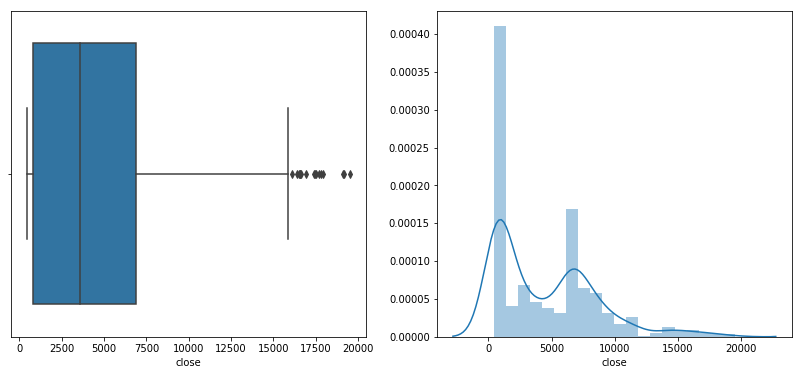

In [11]:
# Visualize the target variable 
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(btc_data.close)
plt.subplot(1,2,2)
sns.distplot(btc_data.close, bins=20)
plt.show()

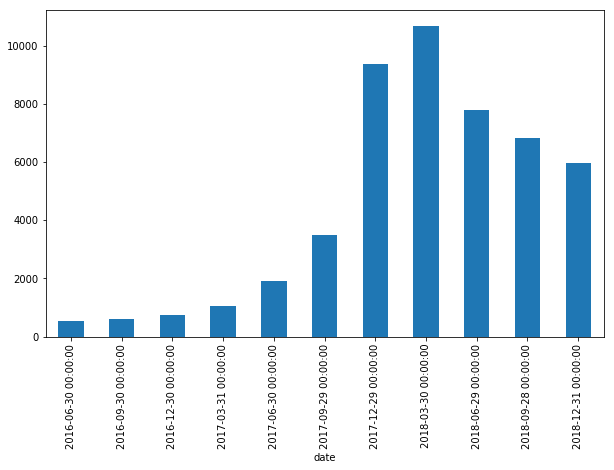

In [12]:
btc_data['close'].resample('BQ').mean().plot(kind='bar', figsize=(10,6))

btc_data['date'] = pd.to_datetime(btc_data['date'])

C:\Users\azutshi\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_base.py:3245: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


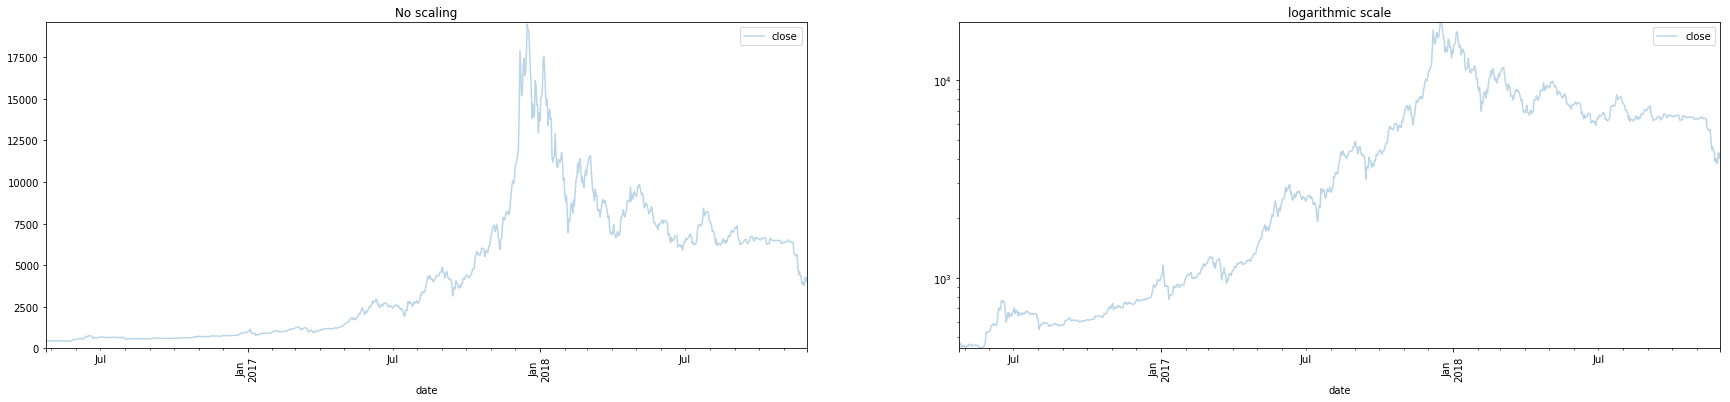

In [13]:
plt.figure(num=None, figsize=(30, 6))
plt.subplot(1,2,1)
ax = btc_data['close'].plot(style=['-'])
ax.lines[0].set_alpha(0.3)
ax.set_ylim(0, np.max(btc_data['close'] + 100))
plt.xticks(rotation=90)
plt.title("No scaling")
ax.legend()
plt.subplot(1,2,2)
ax = btc_data['close'].plot(style=['-'])
ax.lines[0].set_alpha(0.3)
ax.set_yscale('log')
ax.set_ylim(0, np.max(btc_data['close'] + 100))
plt.xticks(rotation=90)
plt.title("logarithmic scale")
ax.legend()

There is a strong upward trend from Jan 2017 to Dec 2017 and strong downward trend from Jan 2018 onwards for each graph
There is no seasnality
There are outliers
There are some variance in the logarithmic scaled data. This will be confirmed using rolling average and standard deviation.

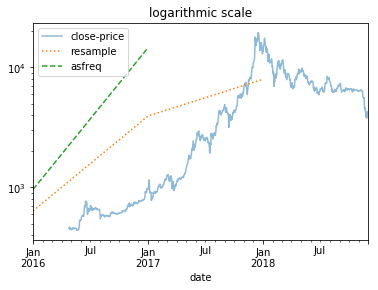

In [14]:
close = btc_data['close']
close.plot(alpha=0.5, style='-')
close.resample('BA').mean().plot(style=':')
close.asfreq('BA').plot(style='--')
plt.yscale('log')
plt.title("logarithmic scale")
plt.legend(['close-price', 'resample', 'asfreq'], 
           loc='upper left')
# 'resample'-- average of the previous year
# 'asfreq' -- value at the end of the year

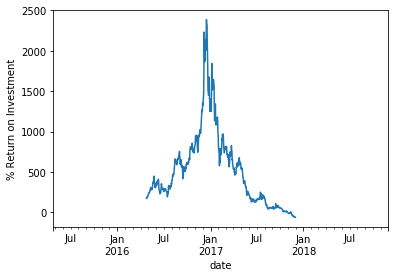

In [15]:
ROI = 100 * (close.tshift(-365) / close - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

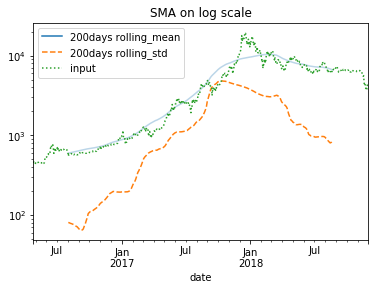

In [16]:
rolling = close.rolling(200, center=True)

data = pd.DataFrame({'input': close, 
                     '200days rolling_mean': rolling.mean(), 
                     '200days rolling_std': rolling.std()})

ax = data.plot(style=['-', '--', ':'])
ax.set_yscale('log')
ax.set_title("SMA on log scale")
rolling = close.rolling(365, center=True)
ax.lines[0].set_alpha(0.3)

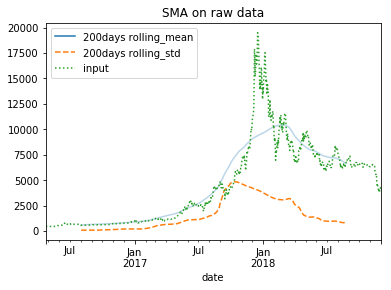

In [17]:
ax = data.plot(style=['-', '--', ':'])
ax.set_title("SMA on raw data")
ax.lines[0].set_alpha(0.3)

C:\Users\azutshi\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,com=200).mean()
  """Entry point for launching an IPython kernel.


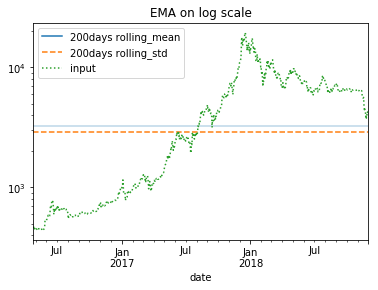

In [18]:
rolling = pd.ewma(close, com=200)

data = pd.DataFrame({'input': close, 
                     '200days rolling_mean': rolling.mean(), 
                     '200days rolling_std': rolling.std()})

ax = data.plot(style=['-', '--', ':'])
ax.set_yscale('log')
ax.set_title("EMA on log scale")
ax.lines[0].set_alpha(0.3)

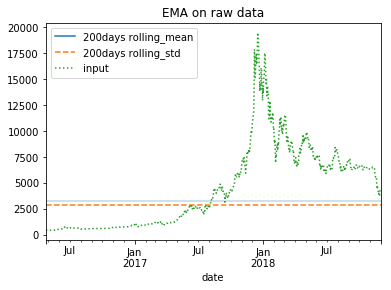

In [19]:
ax = data.plot(style=['-', '--', ':'])
ax.set_title("EMA on raw data")
ax.lines[0].set_alpha(0.3)

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\azutshi\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [21]:
result = seasonal_decompose(close, model='multiplicative')

# Error Trend Seasonality(ETS) Plot

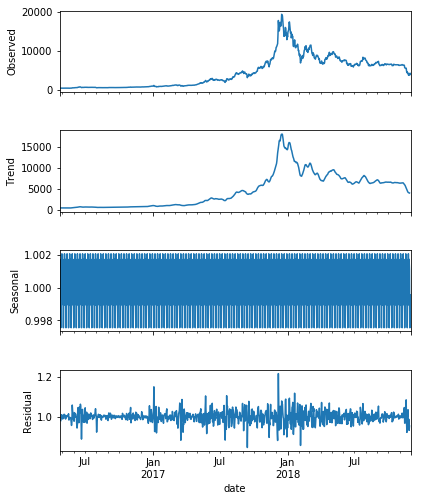

In [249]:
fig = result.plot()
fig.set_size_inches(6,8)

# Lag Plot

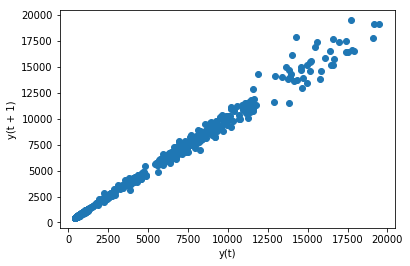

In [25]:
from pandas.plotting import lag_plot
lag_plot(close)

# ACF

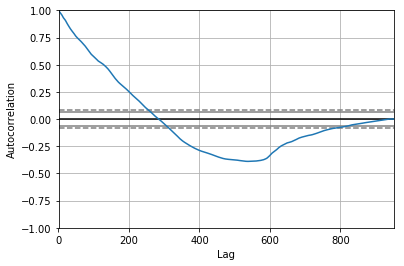

In [26]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(close)

# PACF

In [27]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_pacf

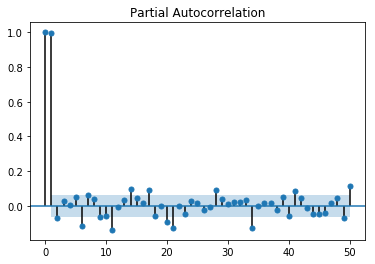

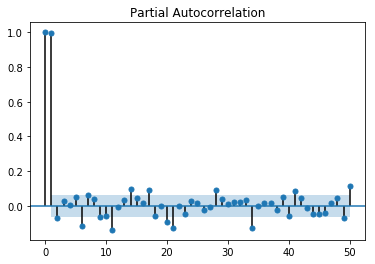

In [28]:
plot_pacf(close, lags=50)

# Test univariate AR model performance using actual close price

In [29]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

test_data= pd.read_csv('test_timeseries2.csv')
close = pd.read_csv('btc_close_price.csv')


In [30]:
test_data['date'] = pd.to_datetime(test_data['date'])

In [31]:
close['date'] = pd.to_datetime(close['Date'])

In [32]:
test_data = test_data.merge(close, on='date')

In [33]:
test_data.head()

,date,avg_block_size,blocks_size,cost_per_transaction_percent,cost_per_transaction,difficulty,est_transaction_volume_USD,est_transaction_volume,hash_rate,median_confirmation_time,...,news_stories_positive,news_stories_negative,news_stories_neutral,Date,Open*,High,Low,Close**,Volume,Market Cap
0,2018-12-01,1.068438,192924.029808,0.923090,26.914157,6.653303e+12,7.051436e+08,171285.334800,4.101145e+07,11.866667,...,297.0,508.0,110.0,1-Dec-18,"4,024.46","4,309.38","3,969.71",4214.67,"5,375,314,093","73,346,194,969"
1,2018-12-02,1.005272,193038.630789,1.715932,27.105352,6.653303e+12,3.517405e+08,84399.905117,3.770407e+07,9.883333,...,287.0,497.0,95.0,2-Dec-18,"4,200.73","4,301.52","4,110.98",4139.88,"5,262,697,895","72,050,487,506"
2,2018-12-03,1.101028,193164.148009,0.455677,24.006523,6.194016e+12,1.267830e+09,319552.043684,3.199801e+07,11.150000,...,386.0,552.0,181.0,3-Dec-18,"4,147.32","4,155.98","3,840.45",3894.13,"5,089,570,994","67,779,050,170"
3,2018-12-04,1.083460,193313.665436,0.279035,25.753689,5.646404e+12,2.493726e+09,629491.330519,3.873443e+07,9.800000,...,383.0,541.0,188.0,4-Dec-18,"3,886.29","4,075.63","3,832.75",3956.89,"5,028,069,239","68,878,292,608"
4,2018-12-05,1.036768,193448.445287,0.442812,24.839415,5.646404e+12,1.438836e+09,372914.991753,3.648895e+07,9.300000,...,359.0,532.0,149.0,5-Dec-18,"3,958.89","3,969.54","3,753.99",3753.99,"5,302,481,574","65,352,496,336"


In [34]:
test_data.shape

(113, 53)

In [35]:
test = test_data['Close**'].values

In [36]:
train_pr = btc_data['close'].values

In [38]:
# train and fit autoregression
model = AR(train_pr)
model_fit = model.fit()

print("Lag: %s" % model_fit.k_ar)
print("Coefficients: %s" % model_fit.params)

pred = model_fit.predict(start=len(train_pr), end=len(train_pr)+len(test_data)-1, dynamic=False)
mse = mean_squared_error(test, pred)
print("Test MSE {0:.3f}".format(mse))

Lag: 21
Coefficients: [  2.51035858e+01   1.05942253e+00  -1.09524091e-01   5.41496358e-02
  -3.37334338e-02   1.66547248e-01  -1.64843423e-01  -9.81753440e-03
   1.18485738e-01  -6.23286757e-02   9.98148814e-02  -1.15933466e-01
  -5.02162582e-02  -4.96234365e-02   2.81525814e-02   3.67582237e-02
  -7.64999318e-02   1.75409969e-01  -7.78797723e-02   1.04160499e-01
   4.73704460e-02  -1.44841260e-01]
Test MSE 142862.636


In [39]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [40]:
mean_absolute_percentage_error(test,pred)

9.1606500555554149

# Simple AR model gives a MAPE of 9.1%

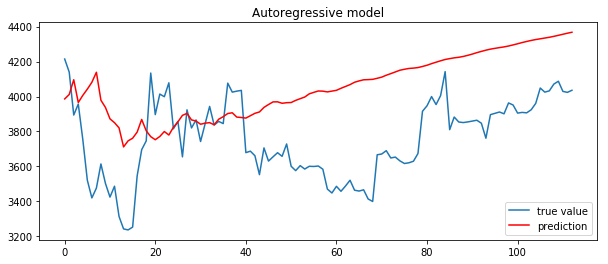

In [41]:
plt.figure(figsize=(10,4))
plt.plot(test, label='true value')
plt.plot(pred, color='red', label='prediction')
plt.title("Autoregressive model")
plt.legend()

# Identify key features to be use for multivariate analysis

In [188]:
def plot_feature(df, col):
    '''
    Make plot for each features
    left, the distribution of samples on the feature
    right, the dependance of salary on the feature
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
#     if df[col].dtype == 'int64' or df[col].dtype == 'float64':
#         df[col].value_counts().sort_index().plot()
#     else:
#         #change the categorical variable to category type and order their level by the mean salary
#         #in each category
#         mean = df.groupby(col)['close'].mean()
#         df[col] = df[col].astype('category')
#         levels = mean.sort_values().index.tolist()
#         df[col].cat.reorder_categories(levels, inplace=True)
#         df[col].value_counts().plot()
#     plt.xticks(rotation=45)
#     plt.xlabel(col)
#     plt.ylabel('Counts')
#     plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64' or df[col].dtype == 'float':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['close'].mean()
        std = df.groupby(col)['close'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'close', data=df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Closing Price')
    plt.show()

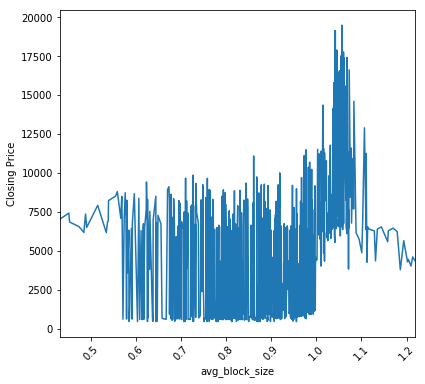

In [190]:
plot_feature(btc_data,'avg_block_size')

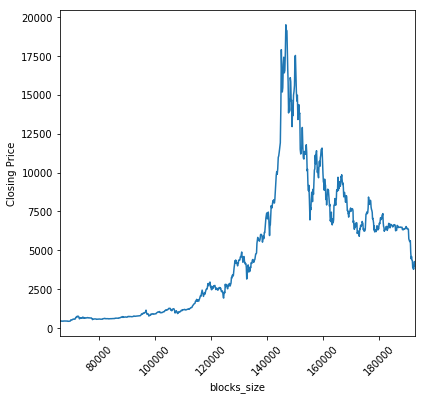

In [191]:
plot_feature(train_data,'blocks_size')

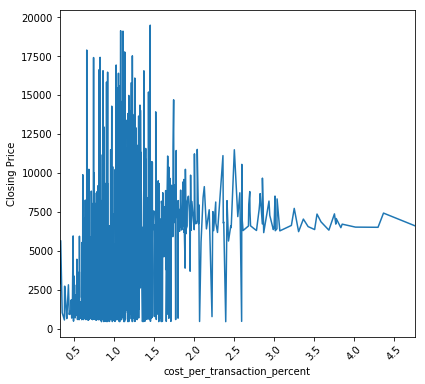

In [192]:
plot_feature(train_data,'cost_per_transaction_percent')

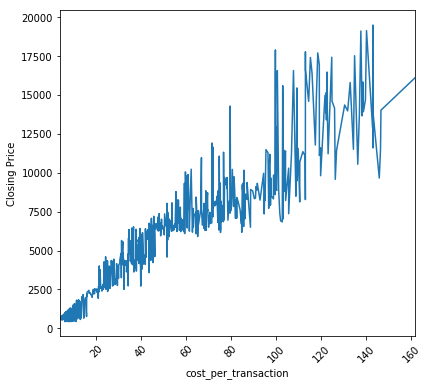

In [193]:
plot_feature(train_data,'cost_per_transaction')

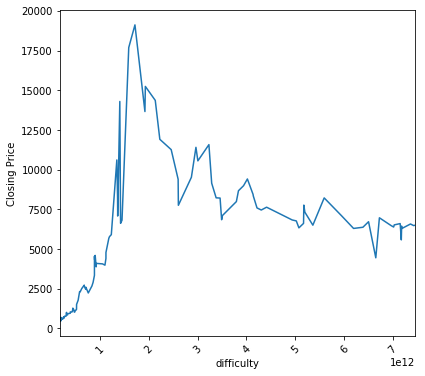

In [194]:
plot_feature(train_data,'difficulty')

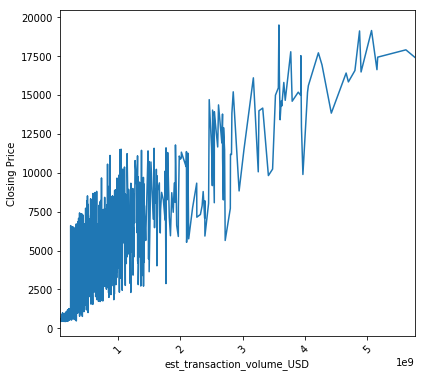

In [195]:
plot_feature(train_data,'est_transaction_volume_USD')

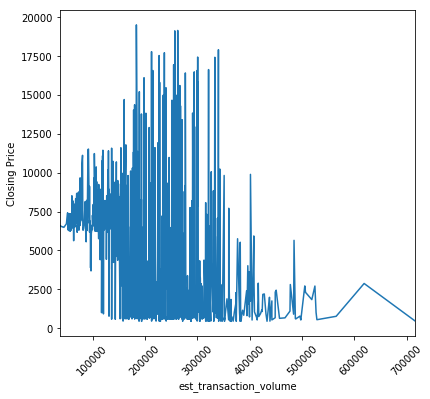

In [196]:
plot_feature(train_data,'est_transaction_volume')

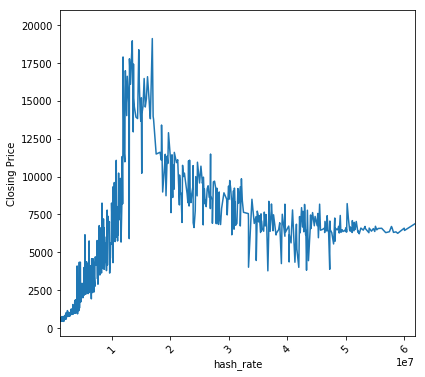

In [197]:
plot_feature(train_data,'hash_rate')

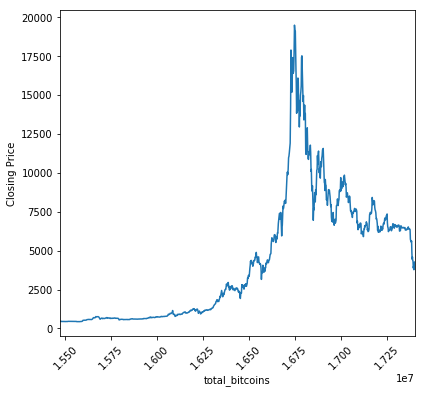

In [198]:
plot_feature(train_data,'total_bitcoins')

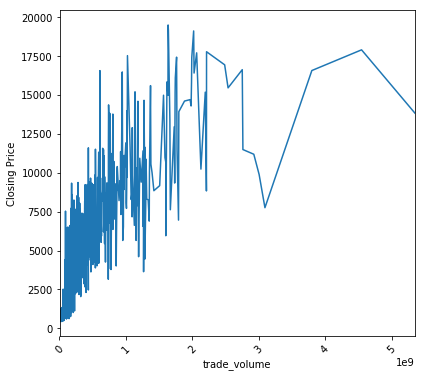

In [199]:
plot_feature(train_data,'trade_volume')

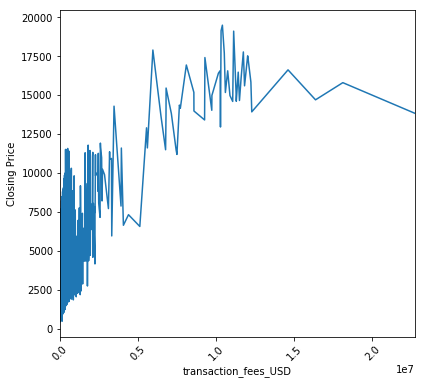

In [200]:
plot_feature(train_data,'transaction_fees_USD')

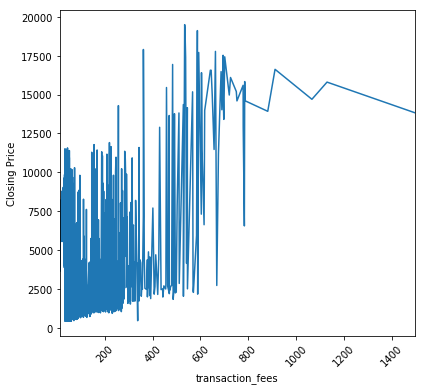

In [201]:
plot_feature(train_data,'transaction_fees')

# Calculate correlations among each of the features with the close price

In [222]:
features = list(btc_data.columns)

In [223]:
features.remove('close')

In [224]:
features

['avg_block_size',
 'blocks_size',
 'cost_per_transaction_percent',
 'cost_per_transaction',
 'difficulty',
 'est_transaction_volume_USD',
 'est_transaction_volume',
 'hash_rate',
 'median_confirmation_time',
 'miners_revenue',
 'n_transactions_excl_chains_longer_than_100',
 'n_transactions_excl_popular',
 'n_transactions_per_block',
 'n_transactions',
 'n_unique_addresses',
 'output_volume',
 'total_bitcoins',
 'trade_volume',
 'transaction_fees_USD',
 'transaction_fees',
 'mempool_count_mean',
 'mempool_count_stddev',
 'mempool_count_min',
 'mempool_count_max',
 'mempool_growth_mean',
 'mempool_growth_stddev',
 'mempool_growth_min',
 'mempool_growth_max',
 'mempool_size_mean',
 'mempool_size_stddev',
 'mempool_size_min',
 'mempool_size_max',
 'wallets_created',
 'transactions_per_sec_mean',
 'transactions_per_sec_stddev',
 'transactions_per_sec_min',
 'transactions_per_sec_max',
 'utxo_count_mean',
 'utxo_count_stddev',
 'utxo_count_min',
 'utxo_count_max',
 'news_stories_total',
 'n

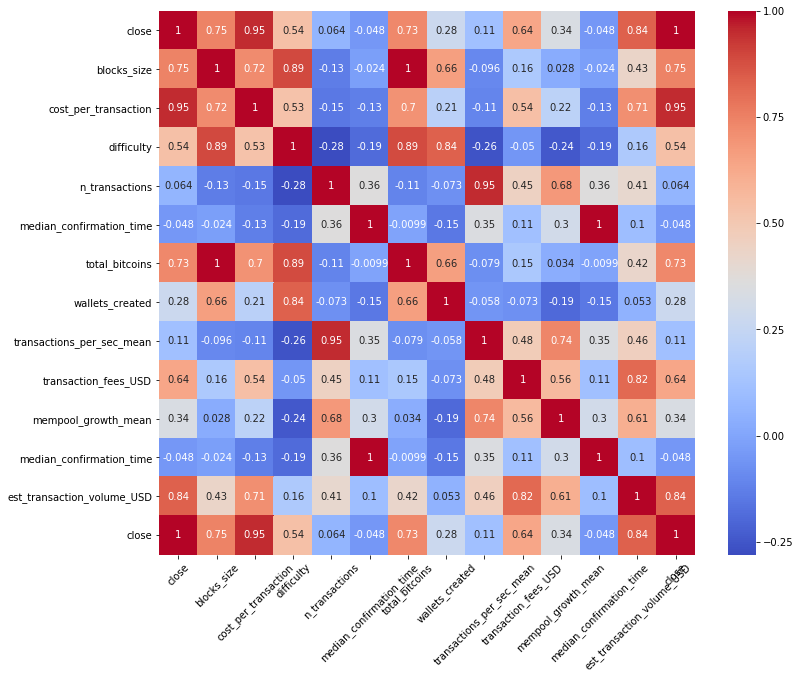

In [228]:
fig = plt.figure(figsize=(12, 10))
features = ['close', 'blocks_size', 'cost_per_transaction' , 'difficulty', 'n_transactions', 'median_confirmation_time' , 
            'total_bitcoins', 'wallets_created' , 'transactions_per_sec_mean', 'transaction_fees_USD',
            'mempool_growth_mean' , 'median_confirmation_time' , 'est_transaction_volume_USD']
sns.heatmap(btc_data[features + ['close']].corr(), cmap='coolwarm', annot=True)
plt.xticks(rotation=45)
plt.show()

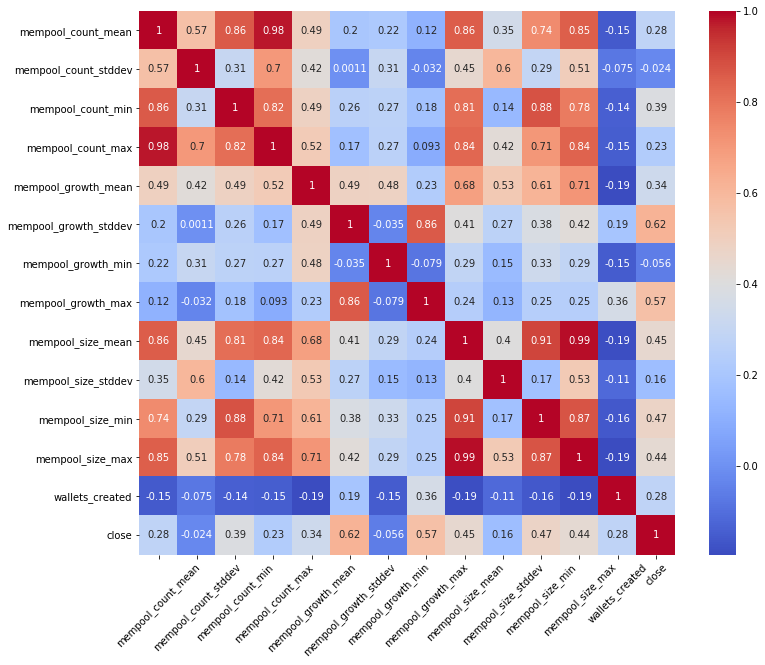

In [327]:
fig = plt.figure(figsize=(12, 10))
features = [ 'mempool_count_mean',
 'mempool_count_stddev',
 'mempool_count_min',
 'mempool_count_max',
 'mempool_growth_mean',
 'mempool_growth_stddev',
 'mempool_growth_min',
 'mempool_growth_max',
 'mempool_size_mean',
 'mempool_size_stddev',
 'mempool_size_min',
 'mempool_size_max',
 'wallets_created',
]
sns.heatmap(btc_data[features + ['close']].corr(), cmap='coolwarm', annot=True)
plt.xticks(rotation=45)
plt.show()

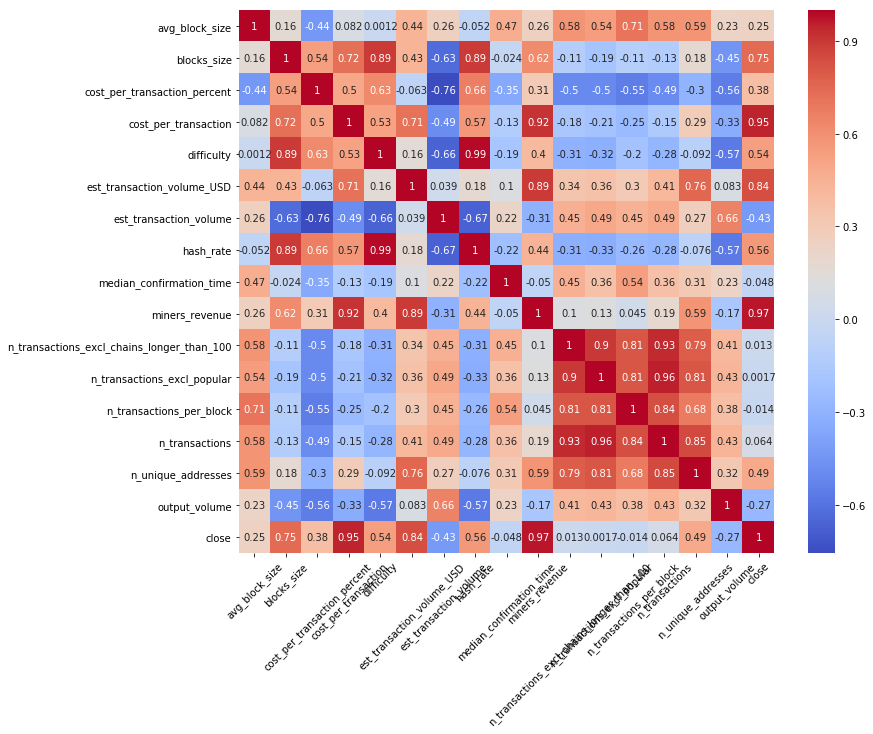

In [329]:
fig = plt.figure(figsize=(12, 10))
features = ['avg_block_size',
 'blocks_size',
 'cost_per_transaction_percent',
 'cost_per_transaction',
 'difficulty',
 'est_transaction_volume_USD',
 'est_transaction_volume',
 'hash_rate',
 'median_confirmation_time',
 'miners_revenue',
 'n_transactions_excl_chains_longer_than_100',
 'n_transactions_excl_popular',
 'n_transactions_per_block',
 'n_transactions',
 'n_unique_addresses',
 'output_volume',

]
sns.heatmap(btc_data[features + ['close']].corr(), cmap='coolwarm', annot=True)
plt.xticks(rotation=45)
plt.show()

# Using a VAR model for multivariate data

Test for stationarity, perform any necessary transformations

In [42]:
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse


In [43]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print('Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [156]:
-bitcoinsadf_test(btc_data['close'])

Augmented Dickey-Fuller Test: {title}
ADF test statistic         -1.827176
p-value                     0.367055
# lags used                20.000000
# observations            930.000000
critical value ({key})     -2.568427
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [151]:
btc_data.columns

Index([u'close', u'avg_block_size', u'blocks_size',
       u'cost_per_transaction_percent', u'cost_per_transaction', u'difficulty',
       u'est_transaction_volume_USD', u'est_transaction_volume', u'hash_rate',
       u'median_confirmation_time', u'miners_revenue',
       u'n_transactions_excl_chains_longer_than_100',
       u'n_transactions_excl_popular', u'n_transactions_per_block',
       u'n_transactions', u'n_unique_addresses', u'output_volume',
       u'total_bitcoins', u'trade_volume', u'transaction_fees_USD',
       u'transaction_fees', u'mempool_count_mean', u'mempool_count_stddev',
       u'mempool_count_min', u'mempool_count_max', u'mempool_growth_mean',
       u'mempool_growth_stddev', u'mempool_growth_min', u'mempool_growth_max',
       u'mempool_size_mean', u'mempool_size_stddev', u'mempool_size_min',
       u'mempool_size_max', u'wallets_created', u'transactions_per_sec_mean',
       u'transactions_per_sec_stddev', u'transactions_per_sec_min',
       u'transactions_per_s

# Selecting the best features for VAR model using the correlation plots above

In [420]:
btc_data_transformed = btc_data[['close', 'mempool_count_max' , 'cost_per_transaction', 'est_transaction_volume_USD', 'blocks_size', 
                                 'total_bitcoins'
                                  ]].diff().dropna()

In [421]:
adf_test(btc_data_transformed['close'])

Augmented Dickey-Fuller Test: {title}
ADF test statistic         -5.608929
p-value                     0.000001
# lags used                19.000000
# observations            930.000000
critical value ({key})     -2.568427
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [422]:
btc_data_transformed.head()

,close,mempool_count_max,cost_per_transaction,est_transaction_volume_USD,blocks_size,total_bitcoins
date,,,,,,
2016-04-25,2.88,-712.0,-1.499085,57539319.9,111.05960,3175.0
2016-04-26,4.66,1830.0,0.814293,2306403.4,122.79014,3775.0
2016-04-27,-21.40,381.0,-1.564849,-2873048.3,112.91929,3225.0
2016-04-28,4.32,4103.0,0.150071,4261857.8,122.15778,3375.0
2016-04-29,6.09,-4243.0,0.706092,28360499.4,128.42990,3950.0


In [423]:
train = btc_data_transformed

In [424]:
train

,close,mempool_count_max,cost_per_transaction,est_transaction_volume_USD,blocks_size,total_bitcoins
date,,,,,,
2016-04-25,2.88,-712.0,-1.499085,5.753932e+07,111.05960,3175.0
2016-04-26,4.66,1830.0,0.814293,2.306403e+06,122.79014,3775.0
2016-04-27,-21.40,381.0,-1.564849,-2.873048e+06,112.91929,3225.0
2016-04-28,4.32,4103.0,0.150071,4.261858e+06,122.15778,3375.0
2016-04-29,6.09,-4243.0,0.706092,2.836050e+07,128.42990,3950.0
2016-04-30,-6.78,-335.0,0.683956,-7.842708e+07,110.60208,3650.0
2016-05-01,3.56,-1832.0,1.577808,-3.632783e+07,96.98623,3875.0
2016-05-02,-7.21,5462.0,-1.353829,5.793138e+07,117.92042,3925.0
2016-05-03,5.63,-1402.0,-0.563856,1.880070e+06,117.51268,3775.0


In [426]:
for i in range(1,8):
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

('Order =', 1)
('AIC: ', 89.521516778376736)
('BIC: ', 89.736403153025435)
()
('Order =', 2)
('AIC: ', 89.103909685623279)
('BIC: ', 89.503318600365787)
()
('Order =', 3)
('AIC: ', 88.94353285120701)
('BIC: ', 89.52777371353352)
()
('Order =', 4)
('AIC: ', 88.777801464201019)
('BIC: ', 89.547184535403744)
()
('Order =', 5)
('AIC: ', 88.485781149520051)
('BIC: ', 89.440617547947397)
()
('Order =', 6)
('AIC: ', 88.259187933135692)
('BIC: ', 89.399789637462277)
()
('Order =', 7)
('AIC: ', 88.158911966381311)
('BIC: ', 89.485591818893965)
()


In [427]:
results = model.fit(7)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 30, Apr, 2019
Time:                     01:03:29
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    89.4856
Nobs:                     943.000    HQIC:                   88.6646
Log likelihood:          -49337.3    FPE:                1.93684e+38
AIC:                      88.1589    Det(Omega_mle):     1.48219e+38
--------------------------------------------------------------------
Results for equation close
                                   coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------
const                               -77.587906       100.403970           -0.773           0.440
L1.close                              0.087496         0.036155            2.420           0.

In [428]:
lag_order = results.k_ar

In [462]:
del z

In [463]:
z = results.forecast(y=train.values[-lag_order:], steps=113)

In [464]:
z

array([[ -2.05518763e+02,  -3.60179814e+03,   1.54101473e+00,
         -5.35469086e+08,   1.26309309e+02,   1.39007015e+03],
       [ -2.18219372e+02,  -4.39735725e+03,  -1.56433391e+00,
         -1.13505554e+08,   1.25036199e+02,   1.39707273e+03],
       [  2.43193274e+01,  -3.15060567e+03,   1.96292165e+00,
         -1.03651275e+07,   1.27556330e+02,   1.42643981e+03],
       [ -5.02922753e+01,   2.04974465e+03,   7.69838218e-01,
         -5.41878737e+07,   1.32509340e+02,   1.43519767e+03],
       [ -1.42980972e+01,   9.14734390e+02,  -1.76445680e+00,
          3.97744791e+07,   1.32858298e+02,   1.43699958e+03],
       [  2.07271441e+01,  -2.21590165e+03,  -1.23055070e+00,
         -6.53089150e+07,   1.31230810e+02,   1.42478013e+03],
       [  1.74068142e+01,  -2.11366982e+02,  -5.32910830e-01,
          1.06118188e+08,   1.34258516e+02,   1.48714892e+03],
       [  6.90817342e+01,   2.23938142e+03,   4.63412101e-01,
          3.58412253e+07,   1.28170798e+02,   1.43734211e+03],


In [465]:
z[100][1]

-32.123246532571102

In [466]:
idx = pd.date_range('12/1/2018', periods=113, freq='D')

In [467]:
df_forecast = pd.DataFrame(z, index=idx, columns=btc_data_transformed.columns)
df_forecast

,close,mempool_count_max,cost_per_transaction,est_transaction_volume_USD,blocks_size,total_bitcoins
2018-12-01,-205.518763,-3601.798139,1.541015,-5.354691e+08,126.309309,1390.070152
2018-12-02,-218.219372,-4397.357252,-1.564334,-1.135056e+08,125.036199,1397.072731
2018-12-03,24.319327,-3150.605666,1.962922,-1.036513e+07,127.556330,1426.439808
2018-12-04,-50.292275,2049.744650,0.769838,-5.418787e+07,132.509340,1435.197666
2018-12-05,-14.298097,914.734390,-1.764457,3.977448e+07,132.858298,1436.999577
2018-12-06,20.727144,-2215.901646,-1.230551,-6.530892e+07,131.230810,1424.780133
2018-12-07,17.406814,-211.366982,-0.532911,1.061182e+08,134.258516,1487.148917
2018-12-08,69.081734,2239.381419,0.463412,3.584123e+07,128.170798,1437.342106
2018-12-09,-2.493655,152.856247,0.645653,-1.515979e+07,129.402061,1469.747075
2018-12-10,-32.446575,-1211.380953,0.642990,-2.002739e+07,129.337225,1478.416314


In [468]:
df_forecast['closeForecast'] = btc_data['close'].iloc[-1] + df_forecast['close'].cumsum()

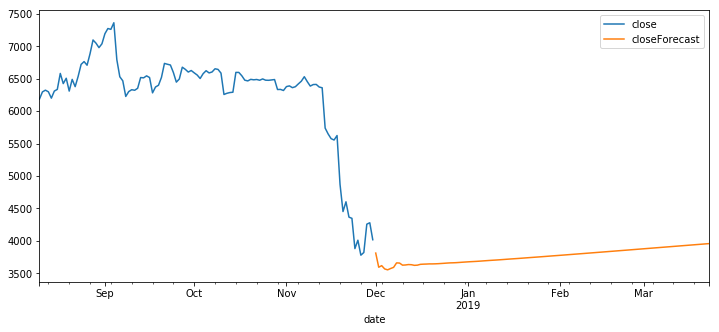

In [469]:
btc_data['close'][-113:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['closeForecast'].plot(legend=True);

In [470]:
df_forecast['closeForecast'].tail(20)

2019-03-04    3888.705068
2019-03-05    3892.340947
2019-03-06    3895.968953
2019-03-07    3899.592906
2019-03-08    3903.219202
2019-03-09    3906.851327
2019-03-10    3910.489201
2019-03-11    3914.129481
2019-03-12    3917.767011
2019-03-13    3921.399231
2019-03-14    3925.028375
2019-03-15    3928.658411
2019-03-16    3932.291735
2019-03-17    3935.928479
2019-03-18    3939.566515
2019-03-19    3943.202516
2019-03-20    3946.834794
2019-03-21    3950.464637
2019-03-22    3954.094512
2019-03-23    3957.726052
Freq: D, Name: closeForecast, dtype: float64

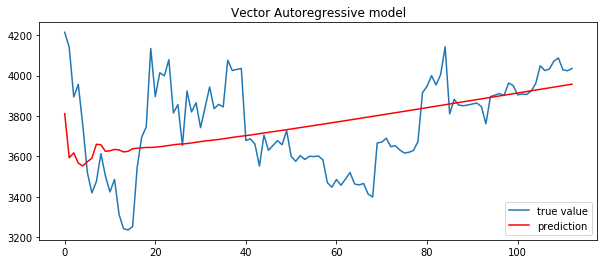

In [471]:
plt.figure(figsize=(10,4))
plt.plot(test, label='true value')
plt.plot(df_forecast['closeForecast'].values, color='red', label='prediction')
plt.title("Vector Autoregressive model")
plt.legend()

pd.to_datetime(df_forecast.index, format='yyyy'

In [307]:
df_forecast['closeForecast'].to_csv('Submission2.csv')

# The VAR model with feature selection gives a MAPE of 4.5%

In [472]:
mean_absolute_percentage_error(test,df_forecast['closeForecast'].values)

4.4851929307253044

In [73]:
tweets = pd.read_csv('train_tweets.csv')

In [74]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53661 entries, 0 to 53660
Data columns (total 7 columns):
tweet_id          53661 non-null object
created_date      53661 non-null object
text              53660 non-null object
retweet_count     53660 non-null float64
favorite_count    53660 non-null object
follower_count    53659 non-null float64
account           53659 non-null object
dtypes: float64(2), object(5)
memory usage: 2.9+ MB


In [75]:
tweets.shape

(53661, 7)

In [76]:
tweets['created_date'].unique()

array(['4/24/2016 4:48', '4/24/2016 4:52', '4/24/2016 4:57', ...,
       '11/30/2018 23:47', '11/30/2018 23:49', '11/30/2018 23:50'], dtype=object)

In [77]:
tweets[tweets['created_date'].str.len() < 10]

,tweet_id,created_date,text,retweet_count,favorite_count,follower_count,account
9960,https://t.co/mXPmC4wiAb,5,2,28206.0,@BitcoinByte,NaN,NaN


Removing the tweet with bad date

In [78]:
tweets = tweets[tweets['created_date'].str.len() >= 10]

def strip_non_ascii(string):
    ''' Returns the string without non ASCII characters'''
    stripped = (c for c in string if 0 < ord(c) < 127)
    return ''.join(stripped)


[i.encode('utf-8') for i in tweets['text']]

def convert_to_ascii(text):
    text = ''.join([i if ord(i) < 128 else ' ' for i in text])
    return text

for i in range(11203):
    convert_to_ascii(tweets['text'][i])

tweets['text'][11202]

In [175]:
tweets = tweets.reset_index()

In [176]:
tweets['created_date'] = pd.DatetimeIndex(tweets['created_date'])

In [177]:
tweets['date'] = tweets['created_date'].dt.date

In [178]:
tweets['date'].unique()

array([datetime.date(2016, 4, 24), datetime.date(2016, 4, 25),
       datetime.date(2016, 4, 26), datetime.date(2016, 4, 27),
       datetime.date(2016, 4, 28), datetime.date(2016, 4, 29),
       datetime.date(2016, 4, 30), datetime.date(2016, 5, 1),
       datetime.date(2016, 5, 2), datetime.date(2016, 5, 3),
       datetime.date(2016, 5, 4), datetime.date(2016, 5, 5),
       datetime.date(2016, 5, 6), datetime.date(2016, 5, 7),
       datetime.date(2016, 5, 8), datetime.date(2016, 5, 9),
       datetime.date(2016, 5, 10), datetime.date(2016, 5, 11),
       datetime.date(2016, 5, 12), datetime.date(2016, 5, 13),
       datetime.date(2016, 5, 14), datetime.date(2016, 5, 15),
       datetime.date(2016, 5, 16), datetime.date(2016, 5, 17),
       datetime.date(2016, 5, 18), datetime.date(2016, 5, 19),
       datetime.date(2016, 5, 20), datetime.date(2016, 5, 21),
       datetime.date(2016, 5, 22), datetime.date(2016, 5, 23),
       datetime.date(2016, 5, 24), datetime.date(2016, 5, 25),
 

In [179]:
tweets.set_index('date', inplace=True)

import re
import pdb
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

for i in range(11203):
#    re.sub(r'[\xf0\x9f\x8e\x93]', '', tweets['text'][i])
#    re.sub(r'[\xf0\x9f\x91\x89]', '', tweets['text'][i])
    re.findall( "@[\w]*",tweets['text'][i])

 re.sub(r'[\xf0\x9f\x8e\x93]', '', tweets['text'])

tweets.drop(tweets.index == 11203, axis=0, inplace=True)

import re,string

def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

strip_links(tweets['text'])

re.search("@" , [s for s in train_data['text']])

# remove twitter handles (@user)
remove_pattern(train_data['text'].astype('str'), "@[\w]*")

In [180]:
train_data = pd.merge(btc_data, tweets, left_index=True, right_index=True, how='outer')

In [181]:
train_data.head()

,close,avg_block_size,blocks_size,cost_per_transaction_percent,cost_per_transaction,difficulty,est_transaction_volume_USD,est_transaction_volume,hash_rate,median_confirmation_time,...,news_stories_positive,news_stories_negative,news_stories_neutral,tweet_id,created_date,text,retweet_count,favorite_count,follower_count,account
date,,,,,,,,,,,,,,,,,,,,,
2016-04-24,458.55,0.72804,66022.67805,1.385967,8.360698,1.786780e+11,110486293.2,240501.2912,1172443.384,8.783333,...,2,0,4,7.24098E+17,2016-04-24 04:48:00,RT @JohnRLottJr: Hugo Chavez's 35 yr old daugh...,111.0,0,36499.0,@BitcoinMoney
2016-04-24,458.55,0.72804,66022.67805,1.385967,8.360698,1.786780e+11,110486293.2,240501.2912,1172443.384,8.783333,...,2,0,4,7.24099E+17,2016-04-24 04:52:00,RT @zerohedge: US Taxpayer Is Now A Major Coun...,91.0,0,36499.0,@BitcoinMoney
2016-04-24,458.55,0.72804,66022.67805,1.385967,8.360698,1.786780e+11,110486293.2,240501.2912,1172443.384,8.783333,...,2,0,4,7.241E+17,2016-04-24 04:57:00,RT @TuurDemeester: Ethereum founder has sold 2...,54.0,0,36499.0,@BitcoinMoney
2016-04-24,458.55,0.72804,66022.67805,1.385967,8.360698,1.786780e+11,110486293.2,240501.2912,1172443.384,8.783333,...,2,0,4,7.24108E+17,2016-04-24 05:30:00,This site has the best #Bitcoin Casino games h...,0.0,1,18633.0,@cryptonewsday
2016-04-24,458.55,0.72804,66022.67805,1.385967,8.360698,1.786780e+11,110486293.2,240501.2912,1172443.384,8.783333,...,2,0,4,7.24169E+17,2016-04-24 09:30:00,Get #Bitcoin loans: https://t.co/fyyZyHGpRr,0.0,0,18633.0,@cryptonewsday


In [182]:
train_data.shape

(53660, 53)

In [183]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53660 entries, 2016-04-24 to 2018-11-30
Data columns (total 53 columns):
close                                         53660 non-null float64
avg_block_size                                53660 non-null float64
blocks_size                                   53660 non-null float64
cost_per_transaction_percent                  53660 non-null float64
cost_per_transaction                          53660 non-null float64
difficulty                                    53660 non-null float64
est_transaction_volume_USD                    53660 non-null float64
est_transaction_volume                        53660 non-null float64
hash_rate                                     53660 non-null float64
median_confirmation_time                      53660 non-null float64
miners_revenue                                53660 non-null float64
n_transactions_excl_chains_longer_than_100    53660 non-null int64
n_transactions_excl_popular                   53

In [184]:
train_data.describe()

,close,avg_block_size,blocks_size,cost_per_transaction_percent,cost_per_transaction,difficulty,est_transaction_volume_USD,est_transaction_volume,hash_rate,median_confirmation_time,...,utxo_count_mean,utxo_count_stddev,utxo_count_min,utxo_count_max,news_stories_total,news_stories_positive,news_stories_negative,news_stories_neutral,retweet_count,follower_count
count,53660.000000,53660.000000,53660.000000,53660.000000,53660.000000,5.366000e+04,5.366000e+04,53660.000000,5.366000e+04,53660.000000,...,5.366000e+04,53660.000000,5.366000e+04,5.366000e+04,53660.000000,53660.000000,53660.000000,53660.000000,53659.000000,53659.000000
mean,6204.355736,0.917645,156619.002805,1.397482,53.738037,3.984923e+12,9.750687e+08,178686.161941,2.854202e+07,10.775849,...,5.500788e+07,25492.137993,5.496409e+07,5.504981e+07,814.806634,314.653746,388.806168,111.339527,119.244973,264444.030507
std,3239.450415,0.156864,33709.125619,0.664998,32.639763,2.598635e+12,7.335965e+08,94583.684834,1.807605e+07,2.890817,...,5.320545e+06,23964.954057,5.309855e+06,5.331468e+06,650.094896,279.323424,332.904380,75.749118,2699.865301,298296.095935
min,438.710000,0.431452,66022.678050,0.324599,3.871172,1.786590e+11,7.246670e+07,37558.212560,1.128033e+06,5.700000,...,3.678307e+07,2664.997103,3.672462e+07,3.682521e+07,1.000000,0.000000,0.000000,0.000000,0.000000,7742.000000
25%,4278.850000,0.806938,137842.677300,0.901247,30.514958,1.196790e+12,6.097995e+08,113622.789200,9.269710e+06,8.616667,...,5.441836e+07,11355.641480,5.438414e+07,5.443181e+07,158.000000,69.000000,51.000000,37.000000,0.000000,43361.000000
50%,6476.290000,0.947043,164969.290500,1.304335,48.647746,3.839320e+12,8.187803e+08,143088.244900,2.827479e+07,10.333333,...,5.586943e+07,17906.837720,5.577546e+07,5.590221e+07,769.000000,279.000000,375.000000,122.000000,4.000000,107542.000000
75%,7895.960000,1.031948,184882.668900,1.685786,75.603694,6.653300e+12,1.095140e+09,229185.331800,4.535662e+07,12.366667,...,5.710037e+07,27938.379280,5.706846e+07,5.712651e+07,1142.000000,410.000000,549.000000,169.000000,26.000000,473175.000000
max,19497.400000,1.218455,192791.543400,4.760788,161.686071,7.454970e+12,5.760245e+09,715367.346300,6.186626e+07,29.250000,...,6.766664e+07,133326.986800,6.761686e+07,6.772137e+07,3064.000000,1530.000000,1842.000000,309.000000,325686.000000,930268.000000


In [185]:
train_data.describe(include=['O'])

,tweet_id,text,favorite_count,account
count,53660,53659,53659,53659
unique,27282,48841,1332,31
top,1.02E+18,Buy #Bitcoin for cash with our #BitcoinATM - l...,0,@BitcoinCenterNY
freq,48,194,18799,3107


In [186]:
train_data.duplicated().sum()

0

In [187]:
stat = train_data.close.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count    53660.000000
mean      6204.355736
std       3239.450415
min        438.710000
25%       4278.850000
50%       6476.290000
75%       7895.960000
max      19497.400000
Name: close, dtype: float64
The upper and lower bounds for suspected outliers are 13321.625 and -1146.815.
